#### K-Means Clustering
<small>
<pre>
1. Choose the number of clusters (𝑘)
2. Initialize 𝑘 random centroids.
3. Assign each point to the nearest centroid.
4. Update centroids as the mean of assigned points.
5. Repeat steps 3–4 until 
    - centroids no longer change significantly
    - a maximum no of iterations is reached
6. Output the final clusters.
</pre>
</small>
<br>

<small>
<b>The Elbow Method:</b> <br>
Helps find the optimal number of clusters in K-means clustering. It involves running the algorithm for different cluster numbers, calculating inertia (sum of squared distances), and plotting the results. The "elbow point," where inertia decreases more slowly, indicates the ideal number of clusters. This method balances model simplicity and clustering effectiveness. <br> <br>


<b>K-Means++ :</b> <br>
reduces the risk of the random initialization trap through <b>probability-weighted centroid</b> selection, ensuring that centroids are well-separated from the start. <br>

1. choose first centroid at random data points
2. for each of the ramaining data points compute the distance (D) to the nearest out of already selected centroids
3. choose next centroid among remaining data points using weighted random selection - weighted by D^2
4. repeat steps 2 and 3 until all k centroids have been selected
5. proceed with standard k means clustering


K-Means++ ensures better initial centroids, leading to faster convergence, higher-quality clusters, and avoiding local minima (getting stuck in suboptimal solutions).

</small>

Importing the libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Importing the dataset

In [44]:
# although for k-means clustering, there is no dependent variable. But, for nicer graph we pick y also
# CustomerId has no role in clustering
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# it will come later!!
# y = dataset.iloc[:, [1, 2]].values

Using the elbow method to find the optimal number of clusters

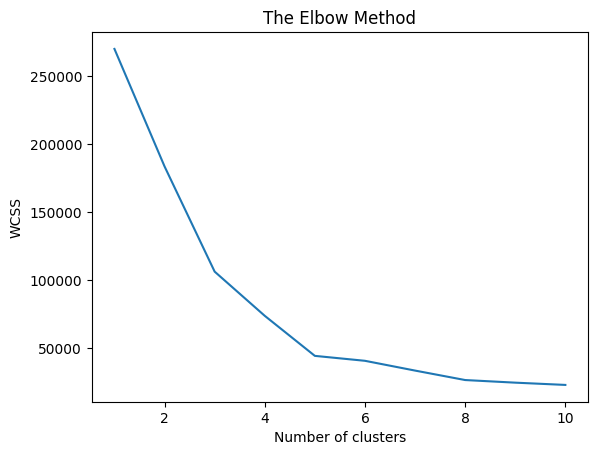

In [45]:
from sklearn.cluster import KMeans
# Within-Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    # 42 --> lucky number of mathematics -_-
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Training the K-Means model on the dataset

In [46]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [47]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Visualising the clusters

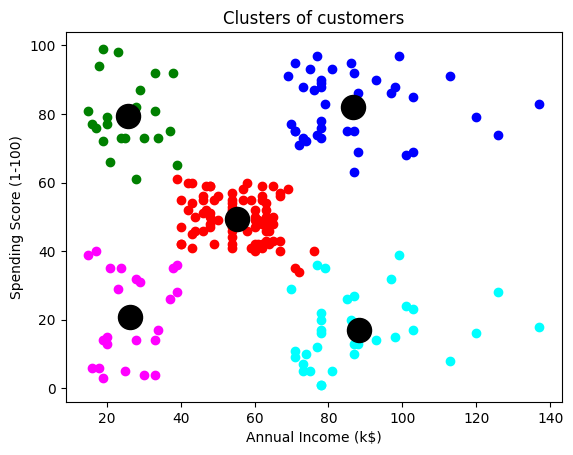

In [48]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', label='Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='blue', label='Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='green', label='Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color='cyan', label='Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()